### Init (import libraries and define common functions)

In [1]:
import sys
import pandas as pd
import json
from urllib.request import urlopen
from IPython.display import display, Markdown

def exists(name):
    return name in locals() or name in globals()

if not exists('currencies'):
    currencies = {}
else:
    print('Keeping the existing cache of currency conversion rates')

"""One euro is equivalent to X in the other currency"""
def euro_equivalent(c):
    c = c.lower()
    if c in currencies:
        return currencies[c]
    else:
        try:
            url = "https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/eur/%s.json" % c
            res = urlopen(url)
            data = json.loads(res.read())
            conversion = data[c]
            currencies[c] = conversion
            print("New currency: %s (%f)" % (c, conversion))
            return conversion
        except:
            return sys.float_info.max
    
"""Multiply the salary X times to get the yearly compensation"""
def yearly_multiplier(freq):
    return 48 if freq == 'Weekly' else 12 if freq == 'Monthly' else 1

"""Remove the outliers from a dataframe based on the values of a single column.
Keep only the rows that, for the specified column, have values in between the [qlow, qhigh] quantiles.
"""
def remove_outliers(df, column, qlow, qhigh):
    low = df[column].quantile(qlow)
    high = df[column].quantile(qhigh)
    print('Keeping only %s in [%f, %f]' % (column, low, high))
    return df[(df[column] < high) & (df[column] > low)]

"""Print markdown in output"""
def print_md(string):
    display(Markdown(string))


### Clean the cache of currency conversion rates

In [78]:
currencies = {}

False

### Read the dataset (it takes a while the first time, to download all the currency rates)

In [5]:
df = pd.read_csv (r'./resources/developer_survey_2021/survey_results_public.csv', 
                  usecols=['Country', 'Currency', 'CompTotal', 'CompFreq', 'YearsCodePro', 'OrgSize'])
initsize = df.size
print("Size after import: %f" % initsize)

# clean it up
df = df.dropna()
print("Size after NA filtering: %f (-%s wrt import)" % (df.size, ((initsize - df.size) / initsize)))

df['YearsCodePro'] = df['YearsCodePro'].map(lambda v: 0 if v == 'Less than 1 year' else 55 if v == 'More than 50 years' else int(v))

# Keep only compensations that are reported as yearly total, as they seem more reliable (see Appendix)
df = df[df.CompFreq == 'Yearly']
print("Size after compensation filtering: %f (-%s wrt import)" % (df.size, ((initsize - df.size) / initsize)))

# Remove unknown organization size
df = df[~df.OrgSize.str.startswith('I don')]
print("Size after org size filtering: %f (-%s wrt import)" % (df.size, ((initsize - df.size) / initsize)))

df['OrgSize'] = df['OrgSize'].map(lambda v: '1 ' if v.startswith("Just me") else v)
df['OrgSizeIdx'] = df.apply(lambda row: int(row['OrgSize'][:row['OrgSize'].find(' ')].replace(',','')), axis=1)

# calculate yearly compensation in EUR
df['Currency'] = df['Currency'].map(lambda s: str(s)[:3])
df['EuroYearlyComp'] = df.apply(lambda row: row['CompTotal'] * yearly_multiplier(row['CompFreq']) / euro_equivalent(row['Currency']), axis=1)


Size after import: 500634.000000
Size after NA filtering: 279234.000000 (-0.44223924064286485 wrt import)
Size after compensation filtering: 149766.000000 (-0.7008473255911504 wrt import)
Size after org size filtering: 147588.000000 (-0.7051978091779624 wrt import)


In [14]:
df.query("Country == 'Italy'").describe()

,YearsCodePro,CompTotal,OrgSizeIdx,EuroYearlyComp
count,510.000000,510.000000,510.000000,510.000000
mean,10.913725,44667.058824,1206.978431,44592.120733
std,7.967050,28064.206602,2894.343121,27939.450039
min,0.000000,38.000000,1.000000,38.000000
25%,5.000000,30000.000000,10.000000,30000.000000
50%,9.000000,39000.000000,20.000000,39000.000000
75%,15.000000,50000.000000,500.000000,50000.000000
max,40.000000,350000.000000,10000.000000,350000.000000


In [52]:
%matplotlib widget

import matplotlib
import matplotlib.pyplot as plt

groups = df.groupby('CompFreq')
for name, group in groups:
    plt.plot(group['EuroYearlyComp'], group['YearsCodePro'], marker=".", linestyle="", label=name, alpha=.1)
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Australia

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  37654   |
|       0.1  |  43427.6 |
|       0.25 |  56481   |
|       0.5  |  75308   |
|       0.75 |  94135   |
|       0.9  | 125513   |
|       0.95 | 150616   |

Keeping only EuroYearlyComp in [37654.004880, 150616.019520]


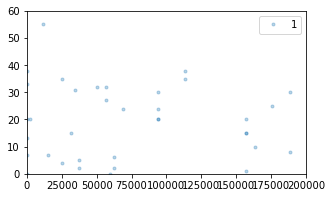

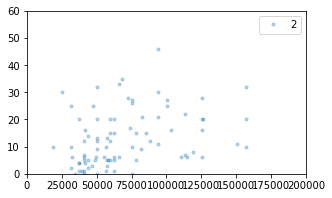

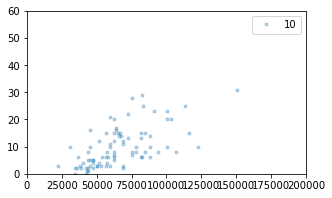

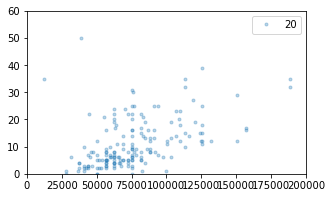

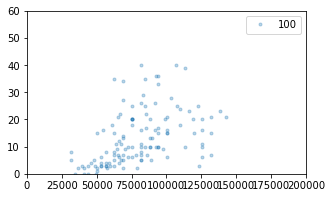

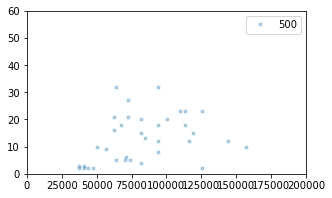

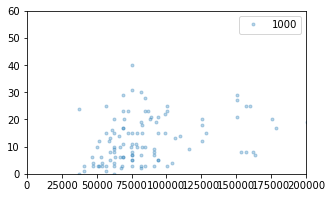

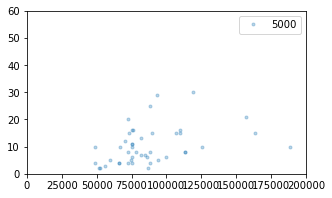

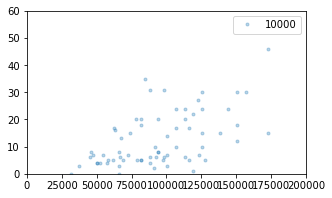

## Austria

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  32400   |
|       0.1  |  38740   |
|       0.25 |  49217.5 |
|       0.5  |  60000   |
|       0.75 |  70000   |
|       0.9  |  90000   |
|       0.95 | 100000   |

Keeping only EuroYearlyComp in [32400.000000, 100000.000000]


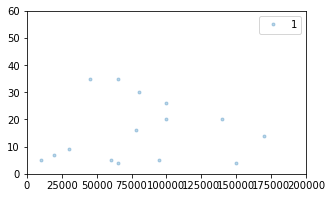

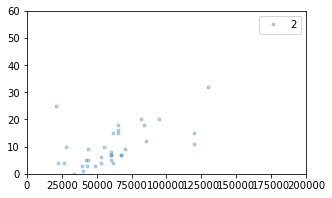

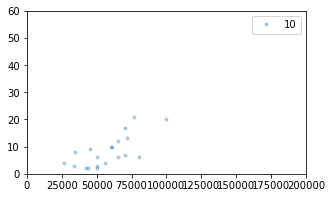

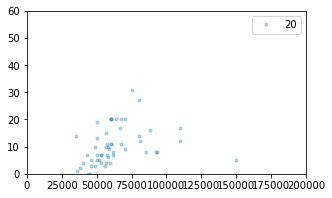

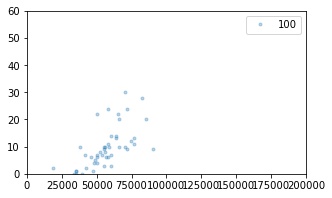

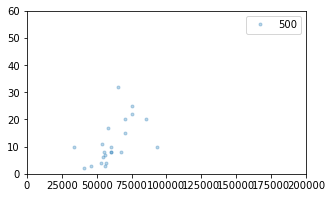

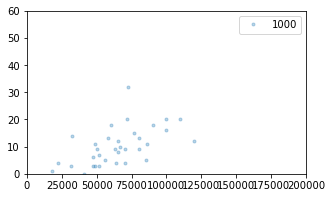

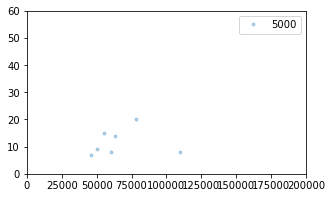

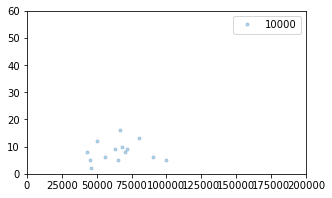

## Brazil

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  7780.85 |
|       0.1  | 10098    |
|       0.25 | 16210.1  |
|       0.5  | 27881.4  |
|       0.75 | 49278.7  |
|       0.9  | 72705.9  |
|       0.95 | 92565.3  |

Keeping only EuroYearlyComp in [7780.847250, 92565.321664]


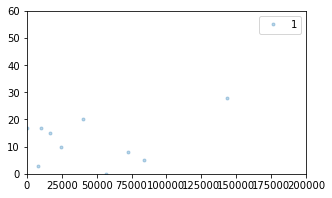

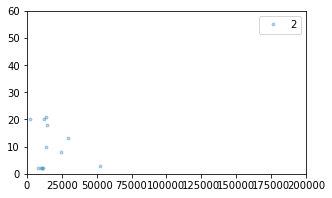

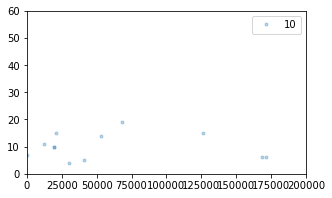

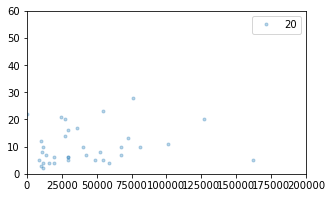

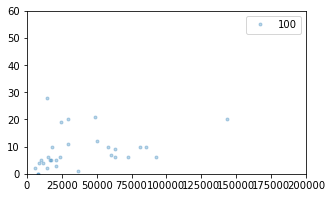

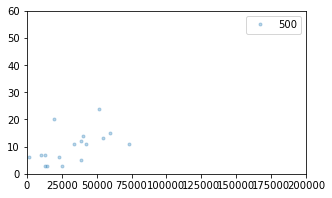

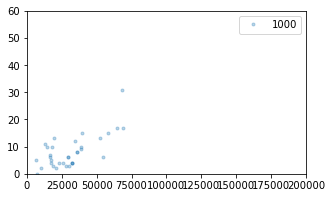

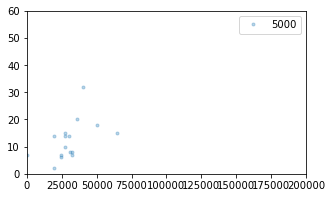

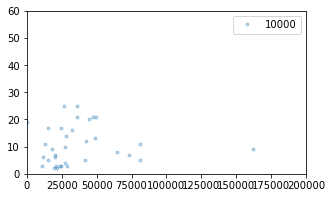

## Canada

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  33591.9 |
|       0.1  |  40310.2 |
|       0.25 |  51665.8 |
|       0.5  |  67183.7 |
|       0.75 |  87338.8 |
|       0.9  | 117571   |
|       0.95 | 141086   |

Keeping only EuroYearlyComp in [33591.856259, 141085.796288]


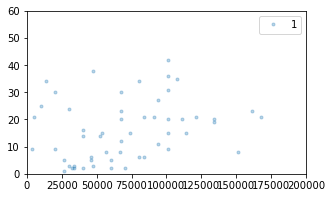

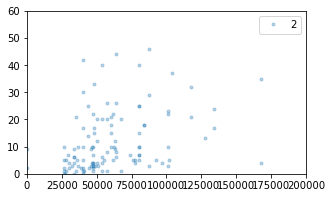

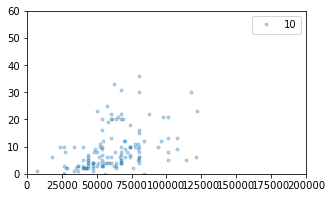

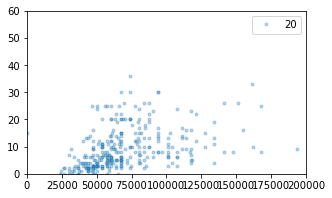

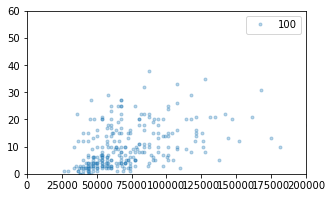

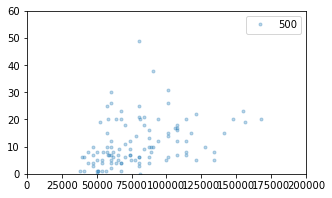

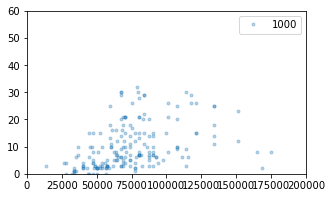

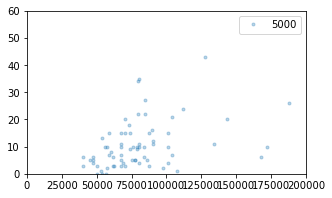

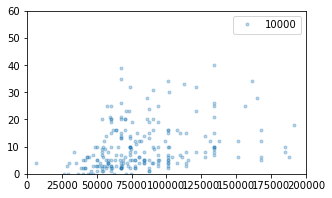

## France

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   30000 |
|       0.1  |   33000 |
|       0.25 |   39000 |
|       0.5  |   48000 |
|       0.75 |   62000 |
|       0.9  |   84000 |
|       0.95 |  110000 |

Keeping only EuroYearlyComp in [30000.000000, 110000.000000]


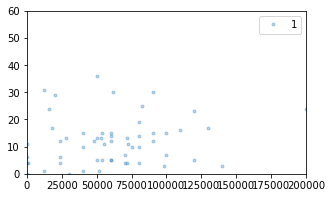

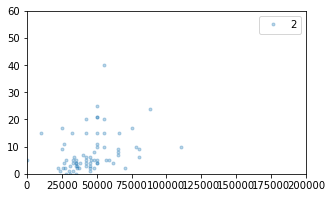

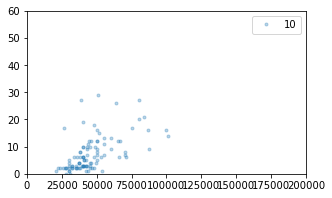

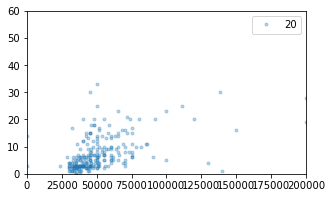

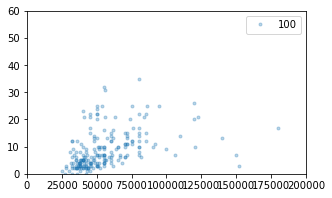

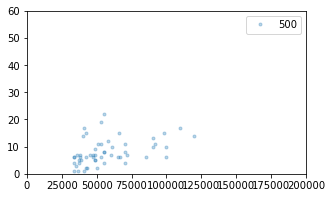

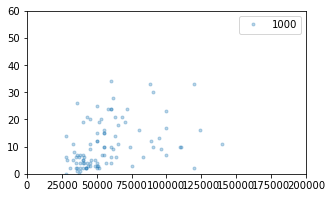

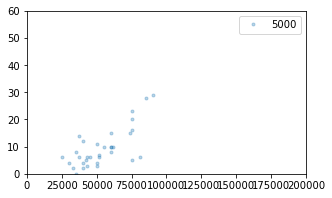

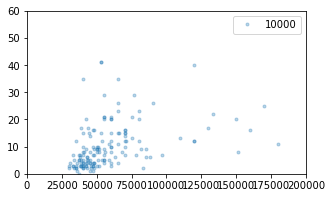

## Germany

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   39000 |
|       0.1  |   44000 |
|       0.25 |   54000 |
|       0.5  |   65000 |
|       0.75 |   80000 |
|       0.9  |  100000 |
|       0.95 |  120000 |

Keeping only EuroYearlyComp in [39000.000000, 120000.000000]


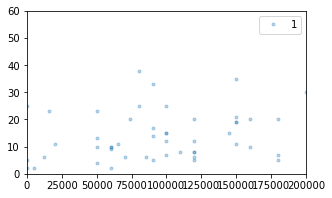

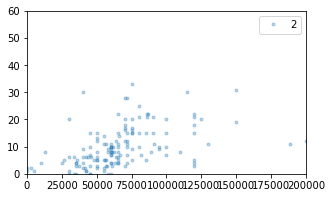

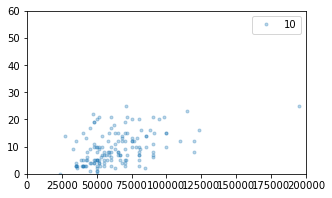

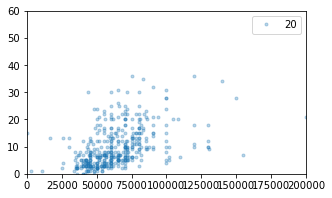

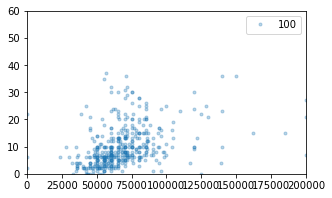

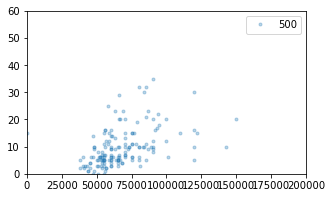

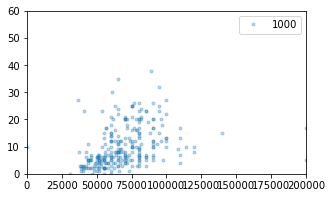

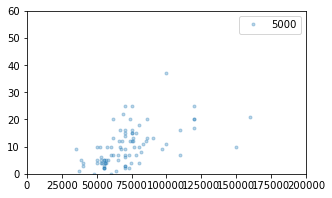

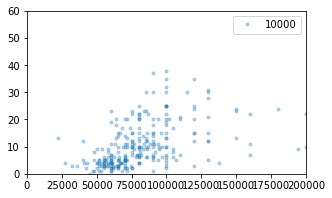

## India

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  3458.48 |
|       0.1  |  4613.62 |
|       0.25 |  8274.42 |
|       0.5  | 14986.8  |
|       0.75 | 24209.4  |
|       0.9  | 40349    |
|       0.95 | 53548.9  |

Keeping only EuroYearlyComp in [3458.484553, 53548.869165]


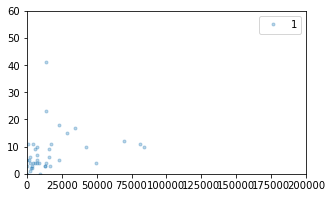

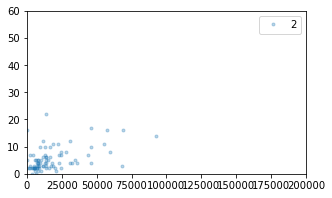

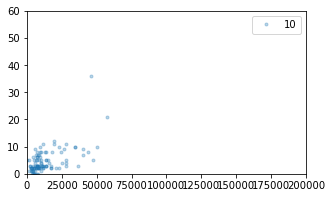

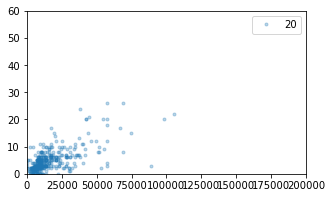

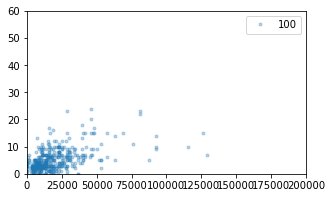

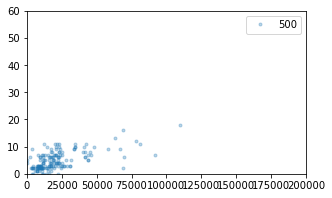

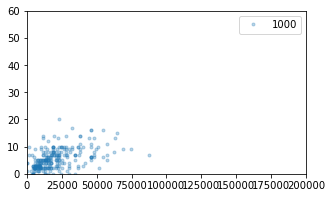

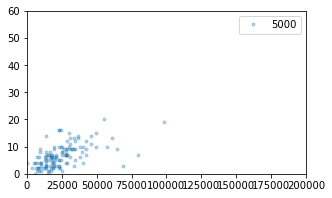

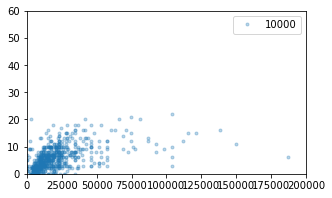

## Ireland

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   32900 |
|       0.1  |   40000 |
|       0.25 |   51000 |
|       0.5  |   74000 |
|       0.75 |  100000 |
|       0.9  |  130000 |
|       0.95 |  160500 |

Keeping only EuroYearlyComp in [32900.000000, 160500.000000]


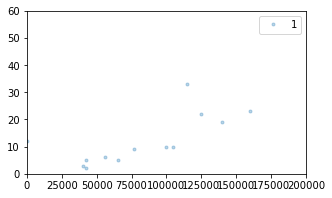

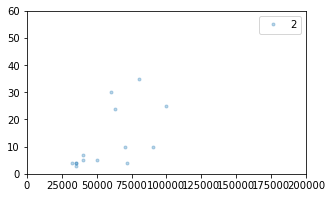

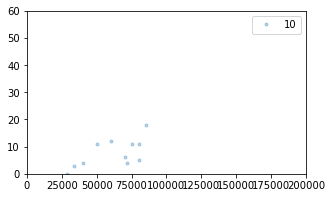

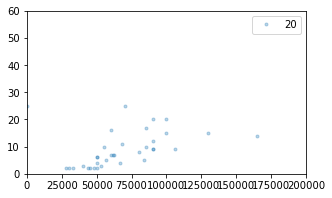

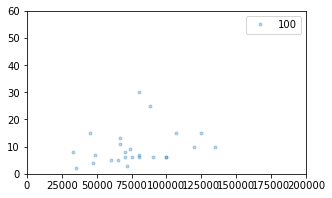

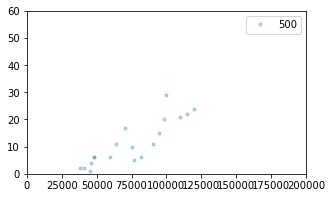

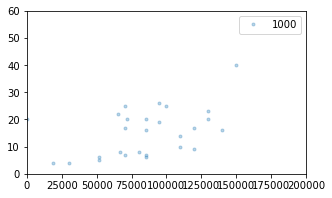

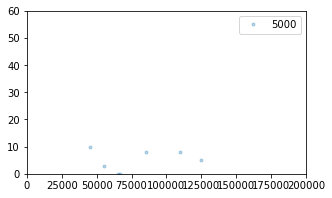

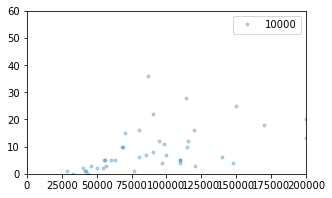

## Italy

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   22000 |
|       0.1  |   25000 |
|       0.25 |   30000 |
|       0.5  |   39000 |
|       0.75 |   50000 |
|       0.9  |   67928 |
|       0.95 |   87750 |

Keeping only EuroYearlyComp in [22000.000000, 87750.000000]


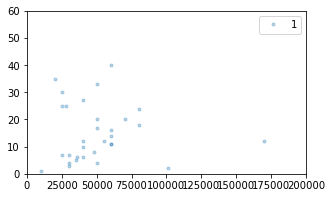

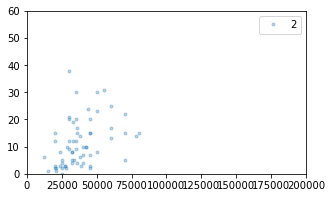

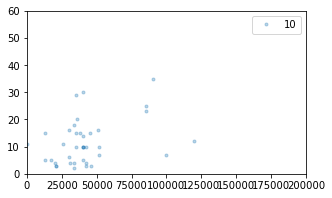

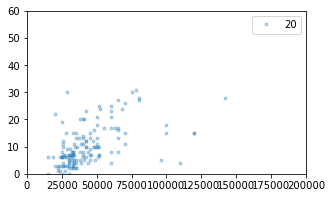

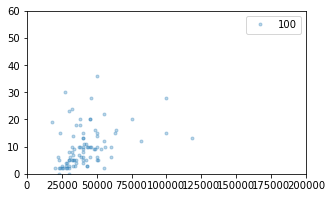

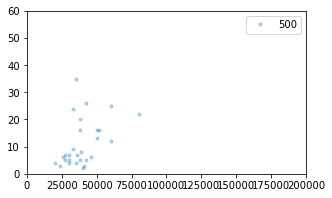

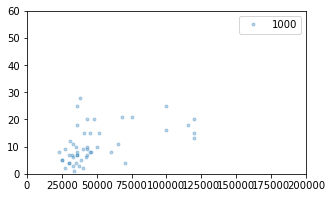

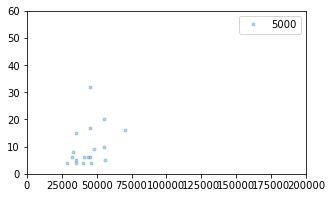

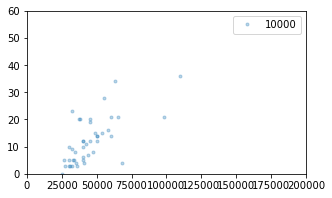

## Japan

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  28532.2 |
|       0.1  |  30679.7 |
|       0.25 |  42184.6 |
|       0.5  |  61359.5 |
|       0.75 |  83602.3 |
|       0.9  | 113172   |
|       0.95 | 138826   |

Keeping only EuroYearlyComp in [28532.151939, 138825.793035]


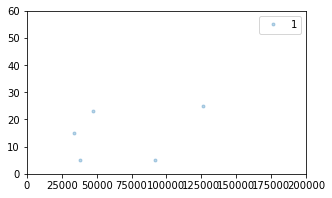

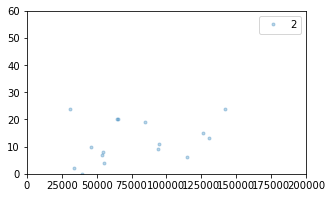

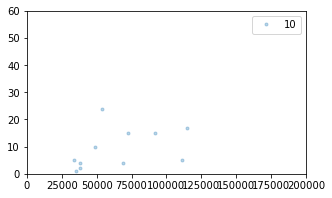

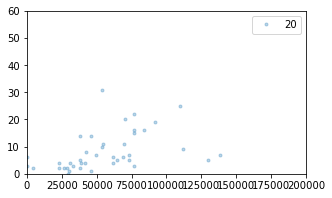

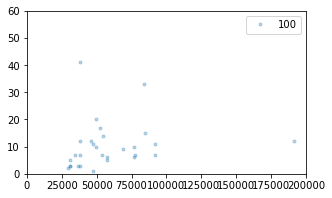

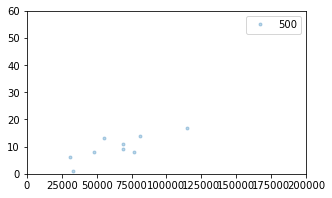

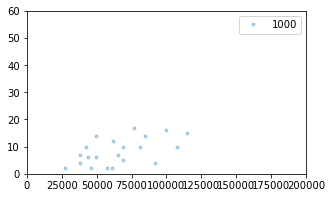

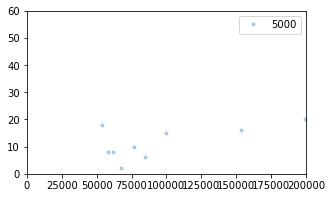

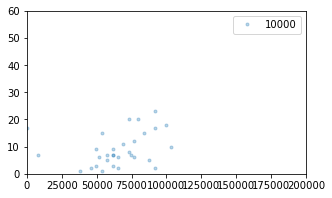

## Netherlands

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   37825 |
|       0.1  |   43000 |
|       0.25 |   52770 |
|       0.5  |   70000 |
|       0.75 |   85000 |
|       0.9  |  120000 |
|       0.95 |  150000 |

Keeping only EuroYearlyComp in [37825.000000, 150000.000000]


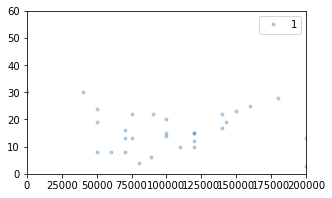

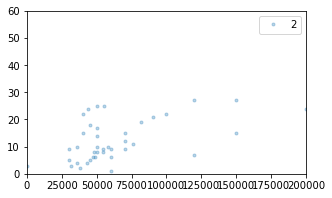

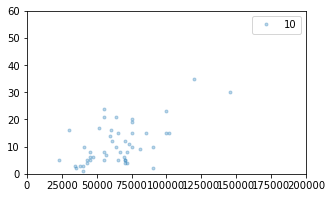

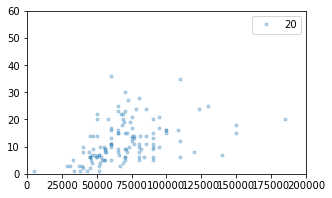

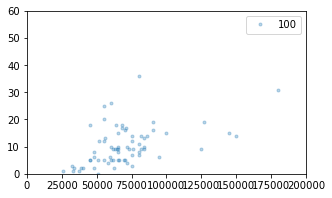

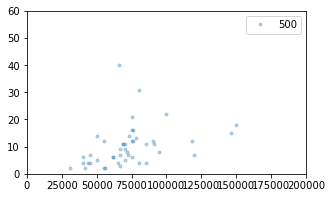

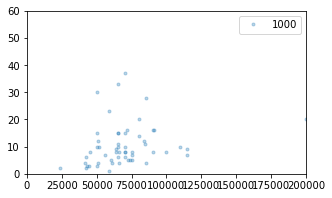

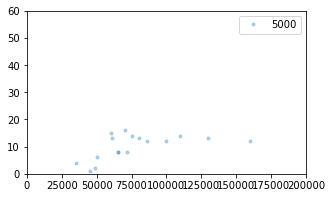

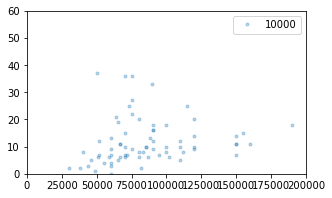

## New Zealand

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  33092.8 |
|       0.1  |  39109.6 |
|       0.25 |  48135   |
|       0.5  |  65583.9 |
|       0.75 |  80626   |
|       0.9  |  96269.9 |
|       0.95 | 126626   |

Keeping only EuroYearlyComp in [33092.778915, 126625.985282]


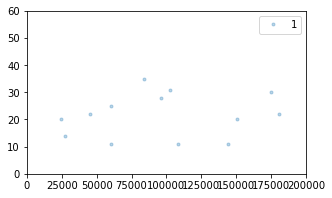

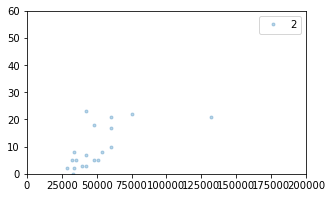

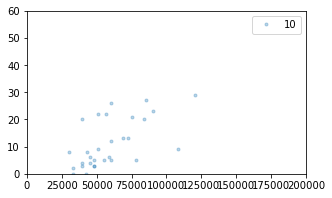

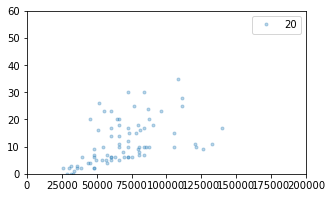

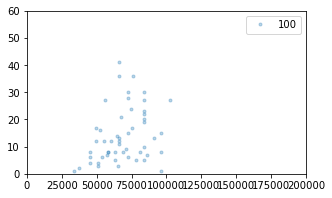

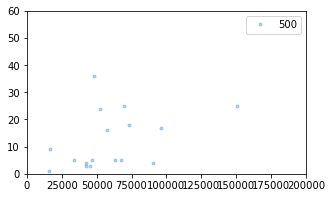

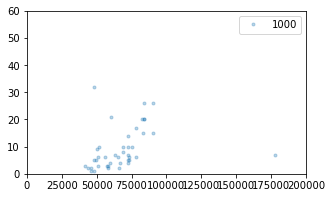

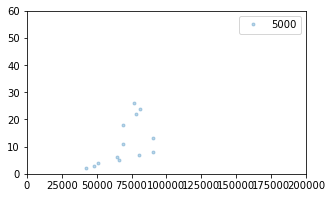

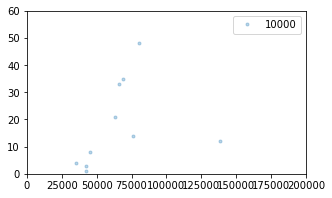

## Norway

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  46576.3 |
|       0.1  |  51428   |
|       0.25 |  59748.7 |
|       0.5  |  72629.9 |
|       0.75 |  87330.6 |
|       0.9  | 106737   |
|       0.95 | 116441   |

Keeping only EuroYearlyComp in [46576.306691, 116440.766728]


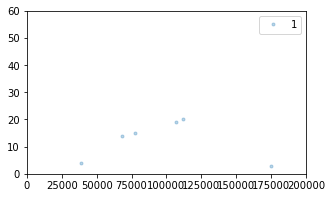

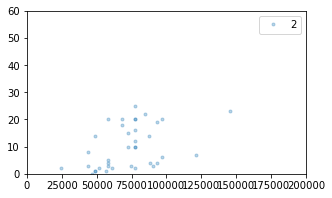

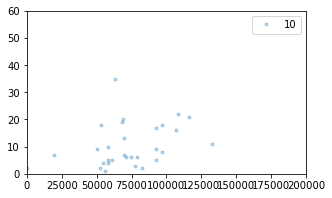

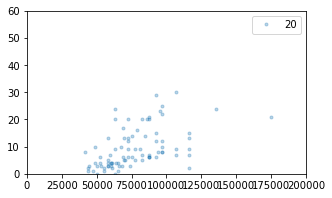

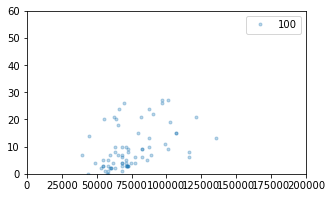

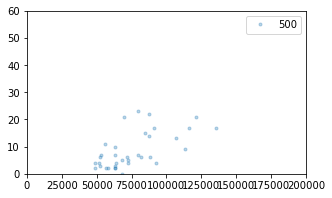

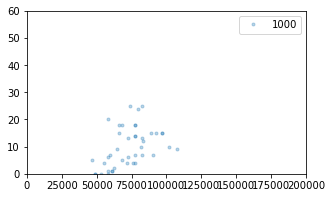

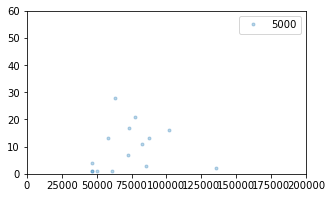

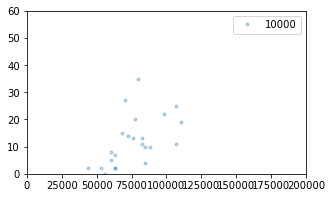

## Portugal

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   20000 |
|       0.1  |   23000 |
|       0.25 |   30000 |
|       0.5  |   42000 |
|       0.75 |   55000 |
|       0.9  |   75000 |
|       0.95 |   88000 |

Keeping only EuroYearlyComp in [20000.000000, 88000.000000]


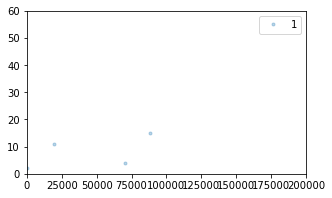

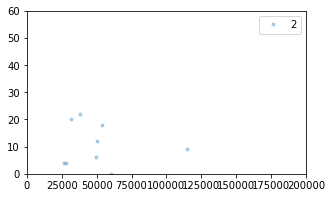

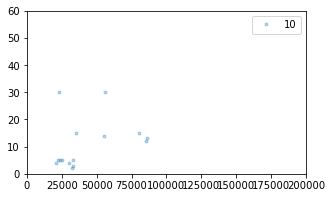

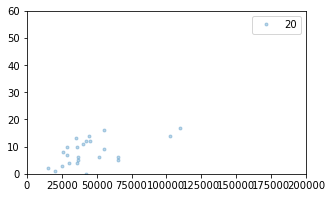

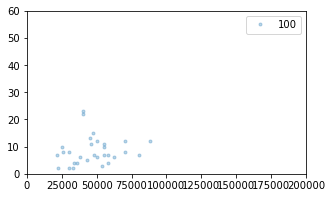

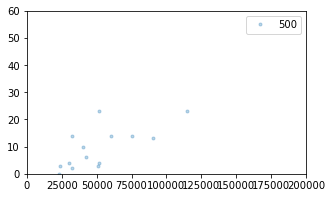

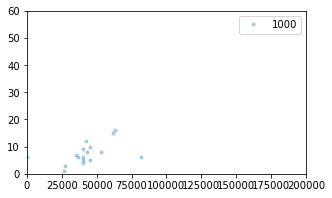

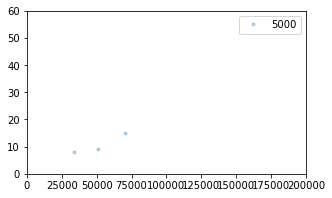

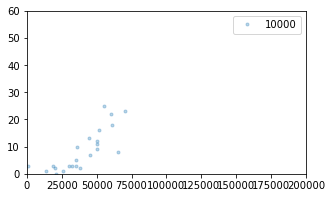

## Spain

### Yearly Compensation (EUR)

|   Quantile |   Comp. |
|-----------:|--------:|
|       0.05 |   18000 |
|       0.1  |   21500 |
|       0.25 |   30000 |
|       0.5  |   40000 |
|       0.75 |   52000 |
|       0.9  |   70000 |
|       0.95 |   86750 |

Keeping only EuroYearlyComp in [18000.000000, 86750.000000]


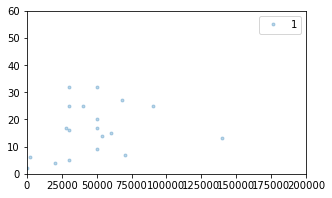

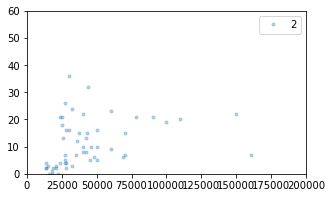

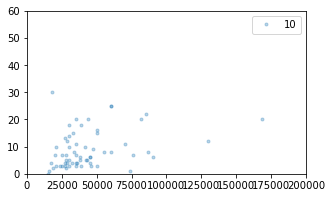

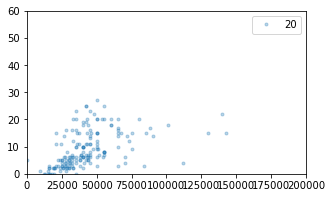

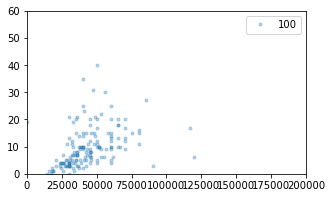

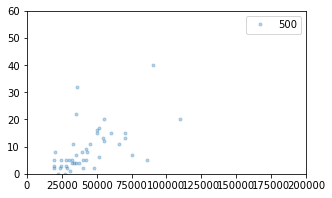

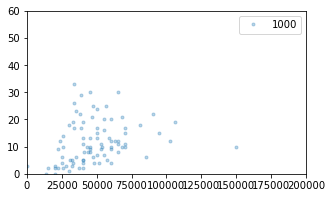

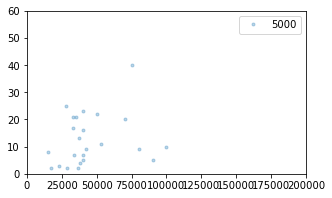

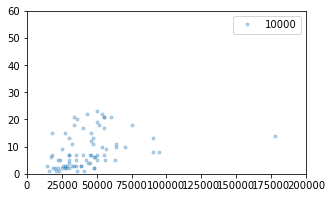

## Switzerland

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  61295.6 |
|       0.1  |  69083.7 |
|       0.25 |  82900.4 |
|       0.5  |  99019.9 |
|       0.75 | 119745   |
|       0.9  | 138167   |
|       0.95 | 165801   |

Keeping only EuroYearlyComp in [61295.641281, 165800.817951]


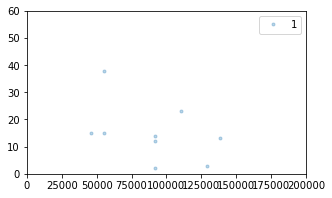

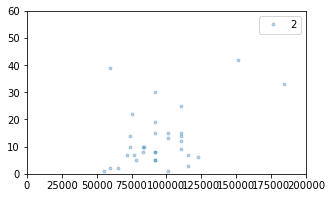

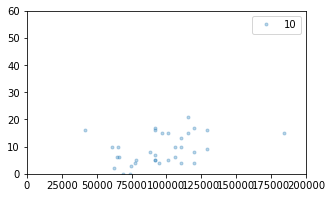

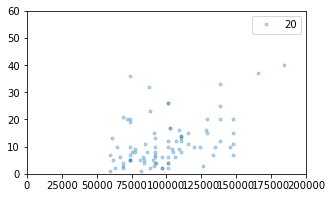

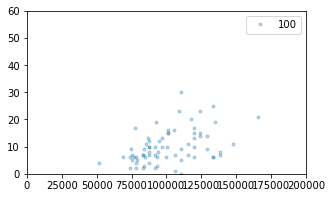

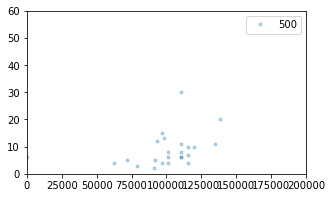

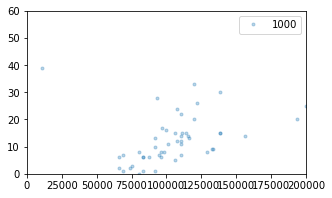

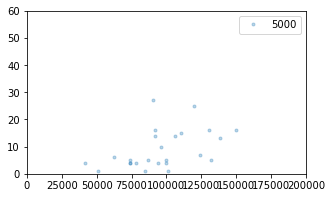

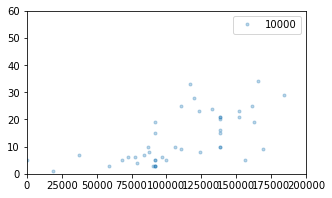

## United Kingdom of Great Britain and Northern Ireland

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  29168.6 |
|       0.1  |  35002.3 |
|       0.25 |  46669.8 |
|       0.5  |  64170.9 |
|       0.75 |  87505.8 |
|       0.9  | 122508   |
|       0.95 | 157044   |

Keeping only EuroYearlyComp in [29168.601517, 157043.750569]


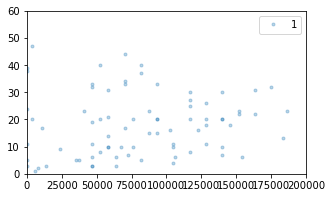

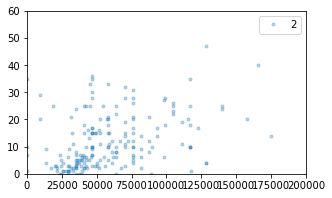

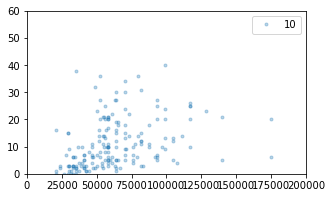

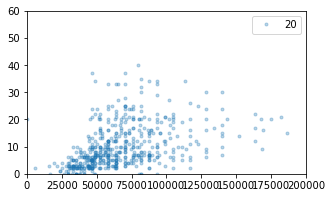

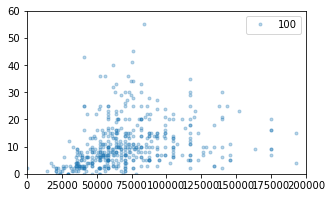

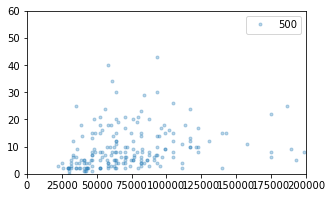

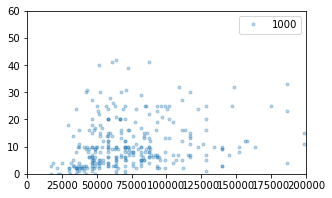

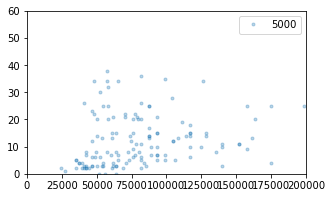

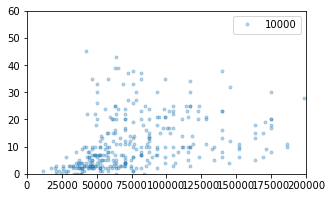

## United States of America

### Yearly Compensation (EUR)

|   Quantile |    Comp. |
|-----------:|---------:|
|       0.05 |  47534.4 |
|       0.1  |  58905.2 |
|       0.25 |  78259.8 |
|       0.5  | 105188   |
|       0.75 | 138848   |
|       0.9  | 189338   |
|       0.95 | 244877   |

Keeping only EuroYearlyComp in [47534.396432, 244877.350949]


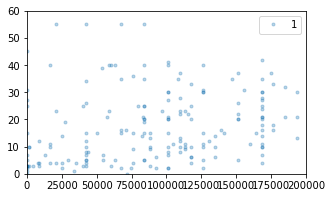

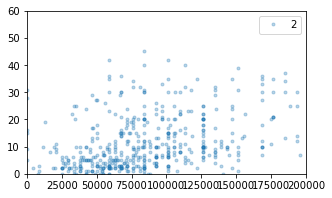

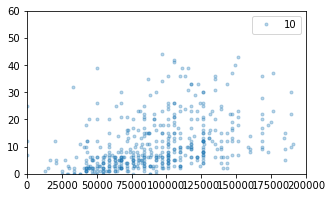

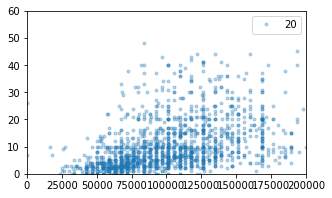

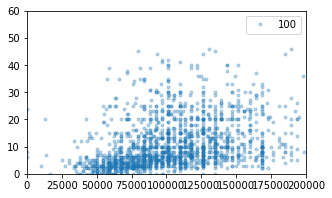

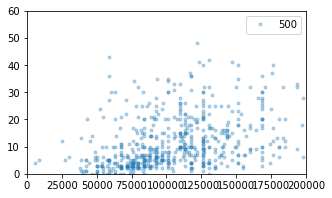

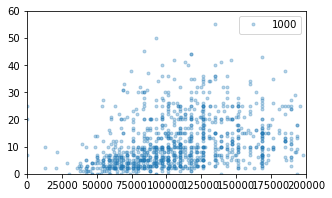

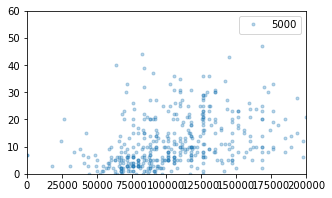

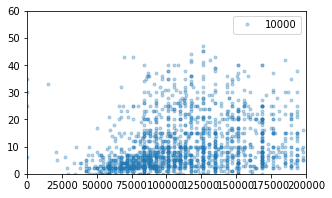

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def country_report(name, df):
    print_md("## %s" % name)
    print_md("### Yearly Compensation (EUR)")
    quantiles = pd.DataFrame([[q, df['EuroYearlyComp'].quantile(q)] for q in [.05, .1, .25, .5, .75, .9, .95]], columns = ['Quantile', 'Comp.'])
    print_md(quantiles.to_markdown(index=False))
    points = remove_outliers(group,'EuroYearlyComp', .05, .95)
    
    bysize = df.groupby('OrgSizeIdx')
    for orgsize, data in bysize:
        fig = plt.figure()
        plt.plot(data['EuroYearlyComp'], data['YearsCodePro'], marker=".", linestyle="", label=orgsize, alpha=.3)  
        x1,x2,y1,y2 = plt.axis()  
        plt.axis((0, 200000, 0, 60))
        plt.legend()
    plt.show()
#     plt.plot(points['EuroYearlyComp'], points['YearsCodePro'], marker=".", linestyle="", label=name, alpha=.3)
#     x1,x2,y1,y2 = plt.axis()  
#     plt.axis((0, 200000, 0, 60))
#     plt.show()

plt.rcParams["figure.figsize"] = (5,3)
groups = df.groupby('Country')
for name, group in groups:
    if group.size > 1000: # ignore countries with few data points
        country_report(name, group)




# Appendix

## Are monthly and weekly compensation reliable?

It seems that monthly compensation is reported to be generally, and sometimes significantly, lower than yearly compensation. This is well visible esapecially in Western and Central European countries - like Austria, France, Germany, Italy, Netherlands, Portugal, Spain.

A possible explaination, to be verified, could be that the fiscal policy in these countries makes it harder to know or understand the exact compensation value *before* taxes, because taxes are subtracted upfront.


## Argentina

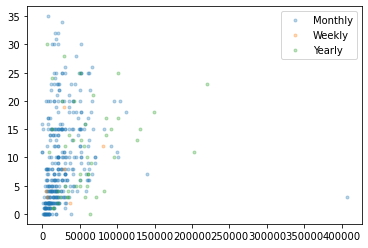

## Australia

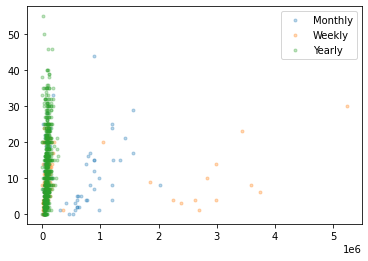

## Austria

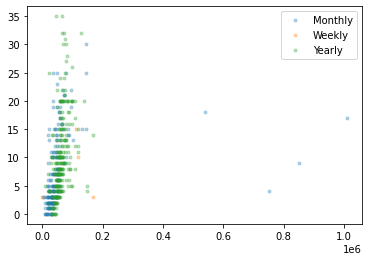

## Bangladesh

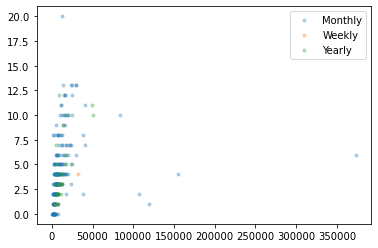

## Belgium

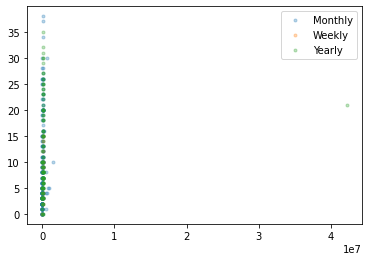

## Brazil

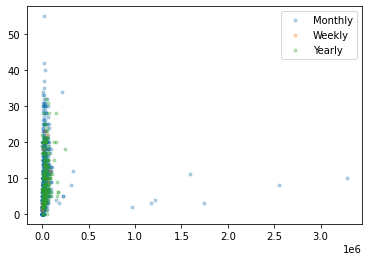

## Bulgaria

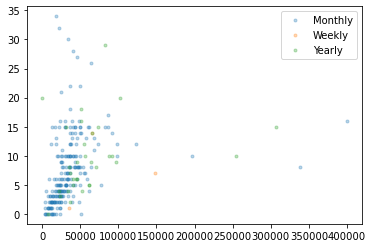

## Canada

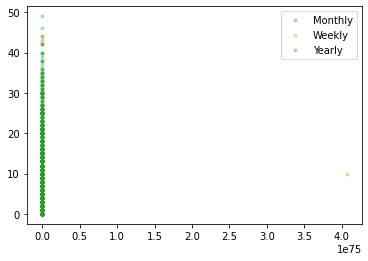

## China

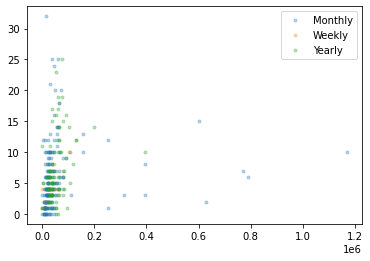

## Colombia

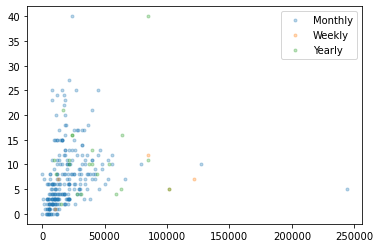

## Czech Republic

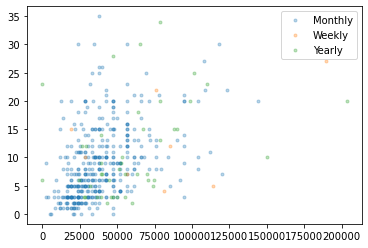

## Denmark

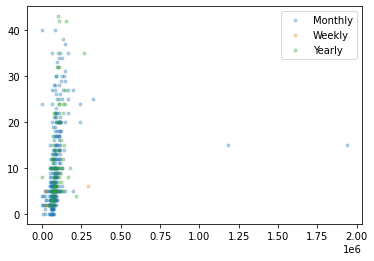

## Egypt

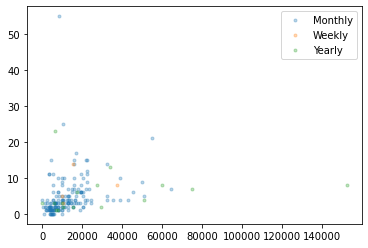

## Finland

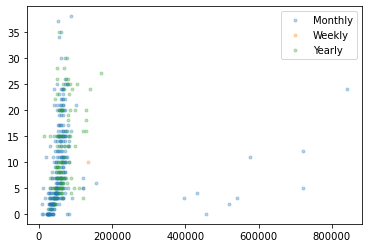

## France

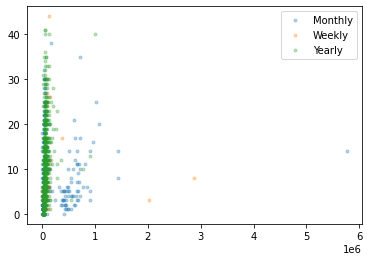

## Germany

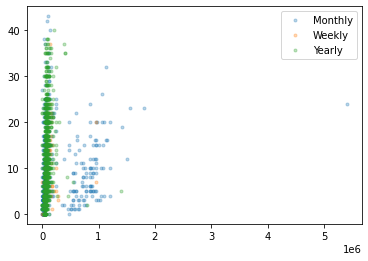

## Greece

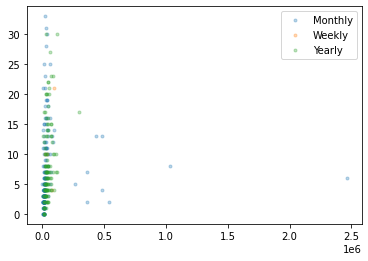

## Hungary

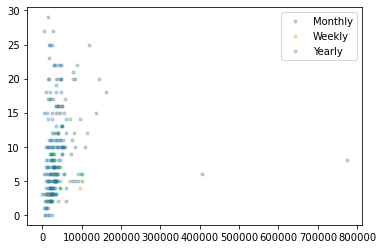

## India

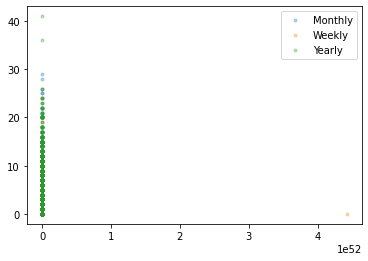

## Indonesia

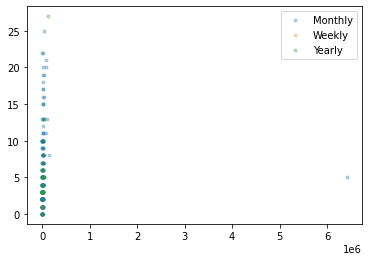

## Iran, Islamic Republic of...

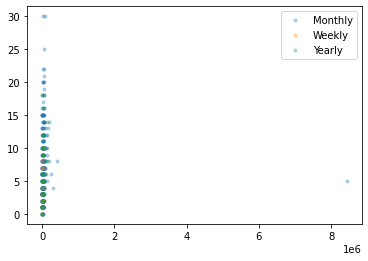

## Ireland

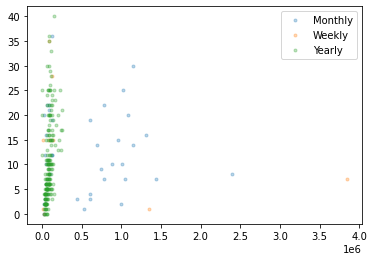

## Israel

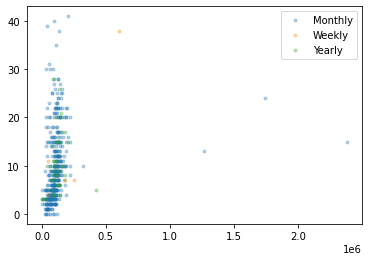

## Italy

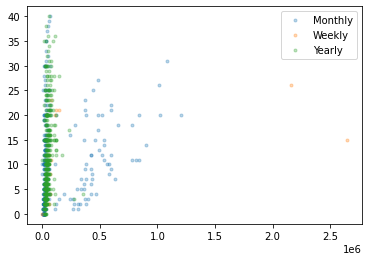

## Japan

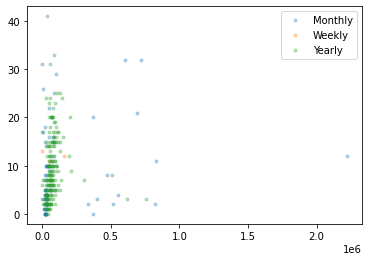

## Mexico

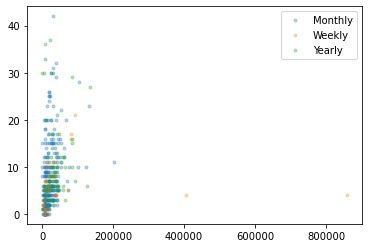

## Netherlands

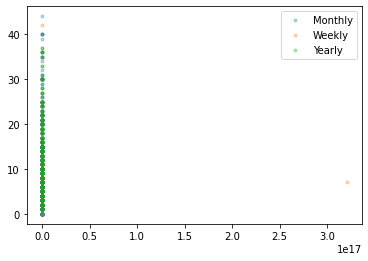

## New Zealand

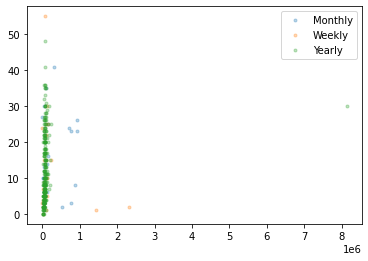

## Nigeria

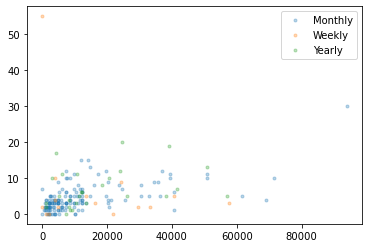

## Norway

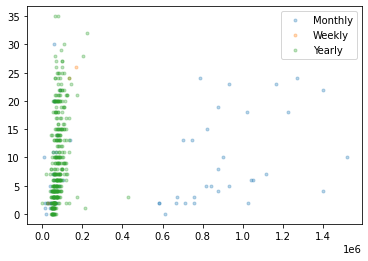

## Pakistan

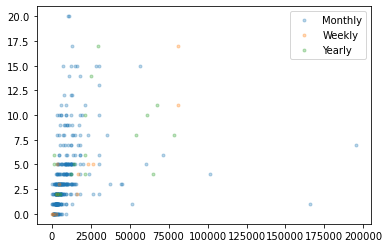

## Philippines

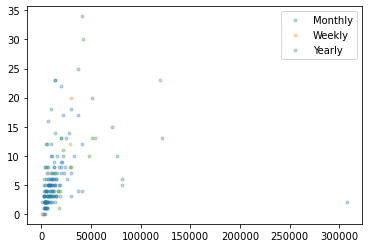

## Poland

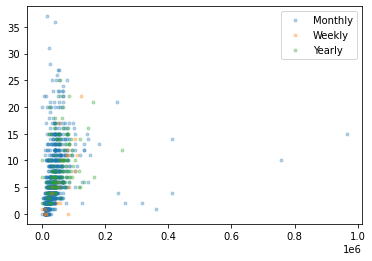

## Portugal

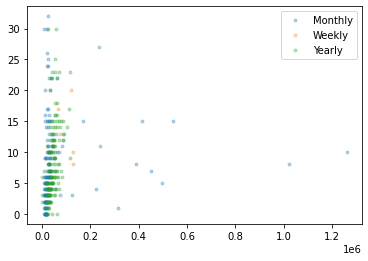

## Romania

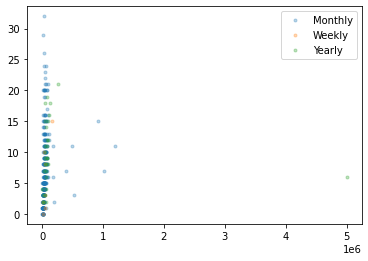

## Russian Federation

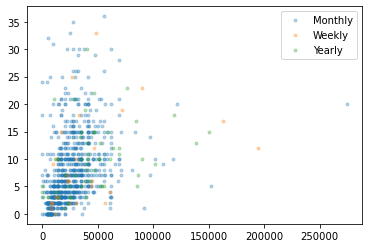

## South Africa

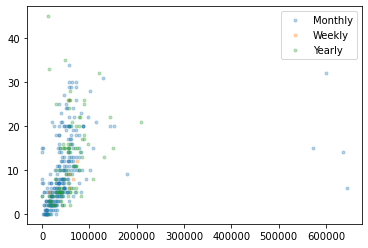

## Spain

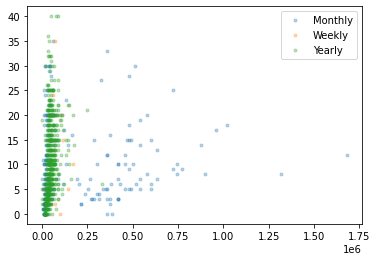

## Sri Lanka

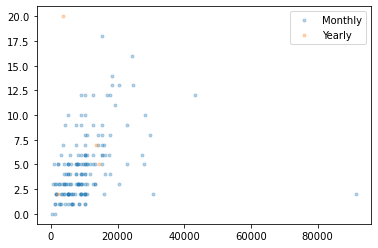

## Sweden

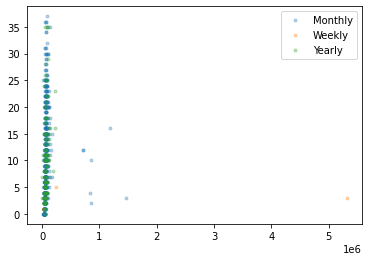

## Switzerland

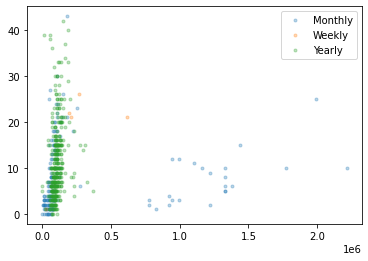

## Turkey

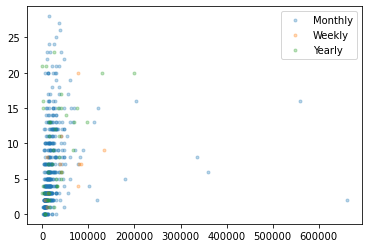

## Ukraine

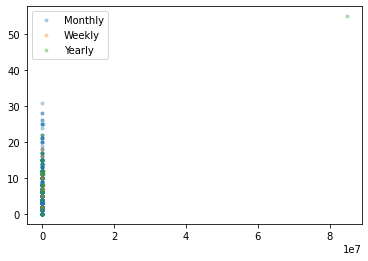

## United Kingdom of Great Britain and Northern Ireland

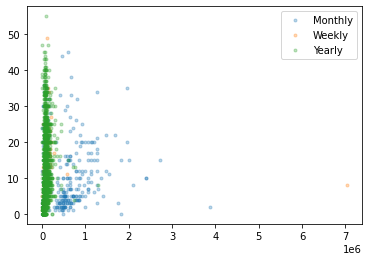

## United States of America

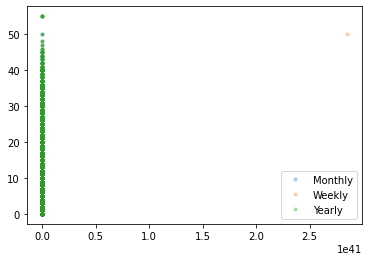

In [38]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

adf = pd.read_csv (r'./resources/developer_survey_2021/survey_results_public.csv', 
                  usecols=['Country', 'Currency', 'CompTotal', 'CompFreq', 'YearsCodePro'])

# remove NA
adf = adf.dropna()

adf['YearsCodePro'] = adf['YearsCodePro'].map(lambda v: 0 if v == 'Less than 1 year' else 55 if v == 'More than 50 years' else int(v))

# calculate yearly compensation in EUR
adf['Currency'] = adf['Currency'].map(lambda s: str(s)[:3])
adf['EuroYearlyComp'] = adf.apply(lambda row: row['CompTotal'] * yearly_multiplier(row['CompFreq']) / euro_equivalent(row['Currency']), axis=1)

for country, cdata in adf.groupby('Country'):
    if cdata.size > 1000: # ignore countries with few data points
        print_md("## %s" % country)
        fig = plt.figure()
        for freq, fdata in cdata.groupby('CompFreq'):
            plt.plot(fdata['EuroYearlyComp'], fdata['YearsCodePro'], marker=".", linestyle="", label=freq, alpha=.3)  
            x1,x2,y1,y2 = plt.axis()  
#             plt.axis((0, 200000, 0, 60))
        plt.legend()
        plt.show()
        
# print_md("## Italy in details")
# itdf = adf.query("Country == 'Italy'")[['CompFreq', 'EuroYearlyComp']]
# itdf.describe()
# itdf = remove_outliers(itdf, 'EuroYearlyComp', .0, .95)
# itdf.plot.hist(alpha=.3, bins=50)

# # adf.query("(Country == 'Italy') & (CompFreq == 'Monthly')")['EuroYearlyComp'].plot.hist(alpha=.3)

# fig = plt.figure()
# adf.query("Country == 'Italy'").plot.scatter(x='EuroYearlyComp', y='YearsCodePro')
# # for freq, fdata in cdata.groupby('CompFreq'):
# #     plt.plot(fdata['EuroYearlyComp'], fdata['YearsCodePro'], marker=".", linestyle="", label=freq, alpha=.3)  
# #     x1,x2,y1,y2 = plt.axis()  
# #     plt.axis((0, 24000, 0, 60))
# # plt.legend()
# plt.show()
        

Monthly and weekly compensation also appear to be often out of scale. This could happen, for example, if by mistake a yearly salary is reported as monthly or weekly.

If we remove from the dataset all the compensations below the .05 quantile and beyond the .95 quantile, we happen to remove the 25% of the weekly data and the 14.5% of the monthly data.

In [54]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

adf = pd.read_csv (r'./resources/developer_survey_2021/survey_results_public.csv', 
                  usecols=['Country', 'Currency', 'CompTotal', 'CompFreq', 'YearsCodePro'])

# remove NA
adf = adf.dropna()

adf['YearsCodePro'] = adf['YearsCodePro'].map(lambda v: 0 if v == 'Less than 1 year' else 55 if v == 'More than 50 years' else int(v))

# calculate yearly compensation in EUR
adf['Currency'] = adf['Currency'].map(lambda s: str(s)[:3])
adf['EuroYearlyComp'] = adf.apply(lambda row: row['CompTotal'] * yearly_multiplier(row['CompFreq']) / euro_equivalent(row['Currency']), axis=1)

with_outliers = adf.groupby('CompFreq').size()
without_outliers = remove_outliers(adf, 'EuroYearlyComp', .05, .95).groupby('CompFreq').size()

result = pd.concat([with_outliers, without_outliers], axis=1, join="inner")
result['Difference'] = (result[0] - result[1]) / result[0]
display(result)

Keeping only EuroYearlyComp in [4834.872860, 204749.750537]


,0,1,Difference
CompFreq,,,
Monthly,20313,17358,0.145473
Weekly,1284,963,0.250000
Yearly,24988,23602,0.055467
